In [4]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

([<matplotlib.axis.XTick at 0x2036c1e7070>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

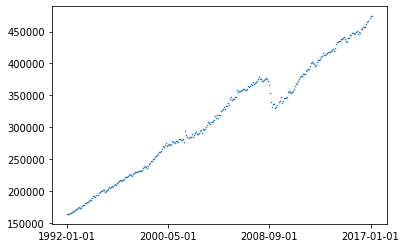

In [5]:
data = pd.read_csv('res/RSAFS.csv')
plt.scatter(data['DATE'], data['RSAFS'], s=0.3)
plt.xticks(data['DATE'][::100])

In [6]:
x = [i for i, _ in enumerate(map(lambda s: datetime.strptime(s, '%Y-%m-%d'), data['DATE']))]

normalized_x = preprocessing.normalize(np.array(x)[:, np.newaxis], axis=0).ravel()
normalized_y = preprocessing.normalize(data['RSAFS'][:, np.newaxis], axis=0).ravel()

<ipython-input-6-ac3c41e9fe05>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  normalized_y = preprocessing.normalize(data['RSAFS'][:, np.newaxis], axis=0).ravel()


([<matplotlib.axis.XTick at 0x20340d8f790>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

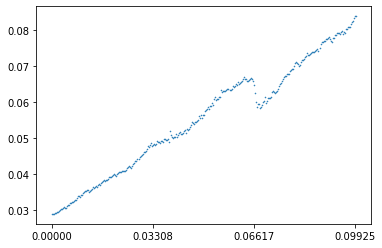

In [7]:
plt.scatter(normalized_x, normalized_y, s=0.3)
plt.xticks(normalized_x[::100])

In [9]:
model = LinearRegression()
model.fit(normalized_x[:, np.newaxis], normalized_y)

LinearRegression()

In [10]:
half_year_offset = 183
step = np.abs(normalized_x[0] - normalized_x[1])

predict_x = np.array([normalized_x[-1] + step * i for i in range(1, half_year_offset)])
predict_y = model.predict(predict_x.reshape(-1, 1))

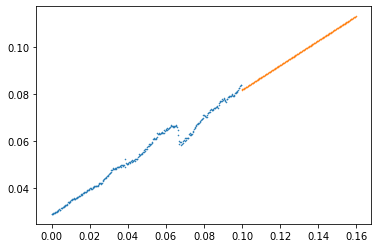

In [18]:
plt.scatter(normalized_x, normalized_y, s=0.3)

plt.scatter(predict_x, predict_y, s=0.3)